# **PROJET ACCIDENTOLOGIE VEHICULES : KAGGLE ESIEE 2023 - 2024**

# **OUVERTURE DES FICHIERS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def open_file(item):
    # Création d'un DataFrame vide pour accumuler les données
    all_data = pd.DataFrame()

    # Boucle sur chaque année
    for annee in range(2012, 2023):
        path = f"TRAIN/BAAC-Annee-{annee}/{item}_{annee}_.csv"
        try:
            # Lecture du fichier CSV
            file = pd.read_csv(path, delimiter=';', index_col = 0,low_memory=False)
            # Concaténation du fichier lu avec le DataFrame global
            all_data = pd.concat([all_data, file])
        except FileNotFoundError:
            print(f"Le fichier {path} n'a pas été trouvé.")
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier {path}: {e}")

    return all_data

In [4]:
def create_dataframe():

    caracteristiques = open_file('caracteristiques')
    lieux = open_file('lieux')
    usagers = open_file('usagers')
    vehicules = open_file('vehicules')

    return caracteristiques,lieux,usagers,vehicules

In [5]:
caracteristiques,lieux,usagers,vehicules = create_dataframe()

### **Isolation de la colonne Grave**

In [6]:
# Convertir la colonne 'grav' en array numpy
grav_array = usagers['grav'].values
num_acc_array = usagers['Num_Acc'].values

# Créer un array pour la présence de 'GRAVE'
is_grave = np.isin(grav_array, [2, 3])

# Utiliser ufuncs de numpy pour créer un mapping de 'Num_Acc' à 'GRAVE'
unique_nums, grave_presence = np.unique(num_acc_array, return_inverse=True)
result = np.bitwise_or.reduceat(is_grave, np.r_[0, np.where(np.diff(num_acc_array))[0]+1])

In [7]:
usagers.drop('grav',axis = 1,inplace = True)

In [8]:
# Création du DataFrame
df_grave = pd.DataFrame({
    'Num_Acc': unique_nums,
    'GRAVE': result
})

df_grave['GRAVE'] = df_grave['GRAVE'].astype(int)

### **Merge GRAVE + Dataframe :** 

In [9]:
def merge_grave(df):

    return df_grave.merge(df,on = "Num_Acc",how = 'left')

### **Fonction Analyse :**

In [10]:
def summary_info(df):

    # Créer un nouveau DataFrame avec ces comptages
    return  pd.DataFrame({
        'NaN_Count': df.isna().sum().astype(int),
        'Nan_ratio': df.isna().mean().astype(float),
        '-1_Count': df.eq(-1).sum().astype(int),
        '0_Count': df.eq(0).sum().astype(int)
    })

In [11]:
lieux = merge_grave(lieux)

## **ANALYSE LIEUX :**

In [12]:
lieux.head()

,Num_Acc,GRAVE,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,201200000001,0,3,39.0,NaN,NaN,2.0,0.0,6.0,875.0,0.0,1.0,1.0,0.0,72.0,1.0,0.0,1.0,0.0,NaN
1,201200000002,1,3,41.0,NaN,NaN,2.0,2.0,13.0,250.0,0.0,1.0,1.0,0.0,65.0,1.0,0.0,1.0,99.0,NaN
2,201200000003,1,3,41.0,NaN,D,2.0,2.0,11.0,500.0,0.0,1.0,3.0,0.0,77.0,1.0,0.0,1.0,0.0,NaN
3,201200000004,0,3,947.0,NaN,NaN,2.0,2.0,0.0,220.0,0.0,1.0,1.0,0.0,70.0,1.0,0.0,1.0,3.0,NaN
4,201200000006,0,4,0.0,NaN,NaN,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,67.0,1.0,6.0,1.0,3.0,NaN


In [13]:
summary_info(lieux).T

,Num_Acc,GRAVE,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
NaN_Count,0.0,0.0,0.0,76653.000000,383085.00000,542503.000000,1244.000000,1655.000000,195174.000000,196380.000000,2011.000000,1555.000000,1854.000000,245134.000000,100307.000000,1539.000000,4572.000000,4323.000000,201176.000000,375366.000000
Nan_ratio,0.0,0.0,0.0,0.134025,0.66981,0.948546,0.002175,0.002894,0.341254,0.343363,0.003516,0.002719,0.003242,0.428608,0.175383,0.002691,0.007994,0.007559,0.351749,0.656313
-1_Count,0.0,0.0,0.0,0.000000,25726.00000,0.000000,10951.000000,1483.000000,0.000000,0.000000,1192.000000,34.000000,30.000000,0.000000,0.000000,61.000000,2003.000000,128.000000,0.000000,3063.000000
0_Count,0.0,339307.0,0.0,106586.000000,160680.00000,0.000000,21697.000000,43287.000000,44356.000000,57071.000000,523917.000000,24459.000000,29143.000000,272730.000000,127105.000000,12985.000000,494886.000000,19441.000000,189425.000000,1.000000


In [14]:
def lieux_del_(df):

    col_to_drop = ['voie','lartpc']
    df = df.drop(col_to_drop,axis = 1)

    return df

In [15]:
def lieux_NaN_(df):

    col_to_replace = ['circ','vosp','prof','plan','larrout','surf','infra','situ','vma','env1','pr','pr1','v1','v2']

    df[col_to_replace] = df[col_to_replace].replace(np.nan,-1)
    
    return df

In [16]:
def lieux_correction_(df):

    df['nbv'] = df['nbv'].replace("#ERREUR",-1)
    df['nbv'] = df['nbv'].replace(" -1",-1)
    df['nbv'] = df['nbv'].fillna(-1)
    df['nbv'] = df['nbv'].astype(int)

    cols_to_replace = ['nbv']

    cols_to_replace = ['surf']

    df[cols_to_replace] = df[cols_to_replace].replace(0,-1)

    return df

In [17]:
def modif_larrout(df):

    df['larrout'] = df['larrout'].astype(str)
    df['larrout'] = df['larrout'].str.replace(',', '.').str.strip()
    df['larrout'] = df['larrout'].str.replace(" -1", "-1")
    df['larrout'] = df['larrout'].astype(float)
    df['larrout'] = np.where(df['larrout'] > 1, np.ceil(df['larrout'] / 100), df['larrout'])
    df['larrout'] = np.where(df['larrout'] > 2, 2, df['larrout'])
    
    return df

In [18]:
def lieux_preprocessing_(df):

    df = lieux_del_(df)
    df = lieux_NaN_(df)
    df = lieux_correction_(df)

    df = modif_larrout(df)

    column = ['catr','circ','vosp','prof','plan','surf','infra','situ','larrout']
    df[column] = df[column].astype(int)

    column = ['catr','circ','vosp','prof','plan','surf','infra','situ','env1','vma','pr','pr1','v1','v2']

    df[column] = df[column].astype('category')

    return df

In [19]:
lieux_naive = lieux_preprocessing_(lieux)

In [20]:
summary_info(lieux_naive).T

,Num_Acc,GRAVE,catr,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,larrout,surf,infra,situ,env1,vma
NaN_Count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Nan_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1_Count,0.0,0.0,0.0,408811.0,542503.0,12195.0,3632.0,195174.0,196380.0,3203.0,1589.0,1884.0,234839.0,14585.0,6575.0,4451.0,201176.0,378429.0
0_Count,0.0,339307.0,0.0,160680.0,0.0,21697.0,44268.0,44356.0,57071.0,523917.0,24459.0,29143.0,127334.0,0.0,494886.0,19441.0,189425.0,1.0


In [21]:
lieux_naive.dtypes

Num_Acc       int64
GRAVE         int32
catr       category
v1         category
v2         category
circ       category
nbv           int32
pr         category
pr1        category
vosp       category
prof       category
plan       category
larrout       int32
surf       category
infra      category
situ       category
env1       category
vma        category
dtype: object

# **TRAINING MODEL :**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = lieux_naive.drop(['Num_Acc','GRAVE'],axis = 1)
y = lieux_naive['GRAVE']

In [24]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

In [25]:
def importance_values(feature_imp_df):

    # Visualisation avec un graphique à barres
    plt.figure(figsize=(10, 6))
    plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Variables')
    plt.title('Importance des variables dans le modèle LightGBM')
    plt.gca().invert_yaxis()  # Inverser l'axe y pour avoir la variable la plus importante en haut
    plt.show()

In [26]:
def loss_curve(evals_result):

    # Extraction des scores L1 pour les ensembles de train et de test
    train_l1 = evals_result['training']['l1']
    test_l1 = evals_result['valid_1']['l1']

    # Création du graphique
    plt.figure(figsize=(10, 6))
    plt.plot(train_l1, label='Train')
    plt.plot(test_l1, label='Test')
    plt.title('Courbe d\'apprentissage du modèle LightGBM')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('L1 Loss')
    plt.legend()
    plt.show()

In [27]:
def auc_curve(evals_result):

    train_auc = evals_result['training']['auc']
    test_auc = evals_result['valid_1']['auc']

    # Graphique pour AUC
    plt.figure(figsize=(10, 6))
    plt.plot(train_auc, label='Train AUC')
    plt.plot(test_auc, label='Test AUC')
    plt.title('Évolution de l\'AUC au fil des itérations')
    plt.xlabel('Nombre d\'itérations')
    plt.ylabel('AUC')
    plt.legend()

In [28]:
def training_model(model,X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    evals_result = {}

    model.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric=['auc', 'l1'])

    y_pred_proba_lgb = model.predict_proba(X_test)[:, 1]
    auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
    print("AUC LightGBM:", auc_lgb)

    # Extraction des importances des variables
    feature_importances = model.feature_importances_

    evals_result = model.evals_result_

    feature_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    importance_values(feature_imp_df)
    loss_curve(evals_result)
    auc_curve(evals_result)

    return feature_imp_df

In [29]:
lgb_model = lgb.LGBMClassifier(enable_categorical = True,learning_rate = 0.01,verbose = -1,n_estimators = 400,objective='binary')

AUC LightGBM: 0.762486098215442


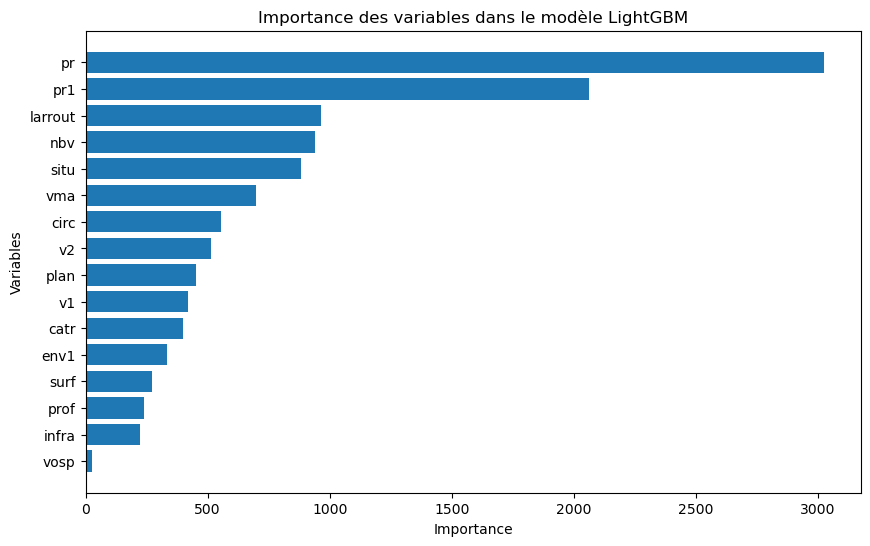

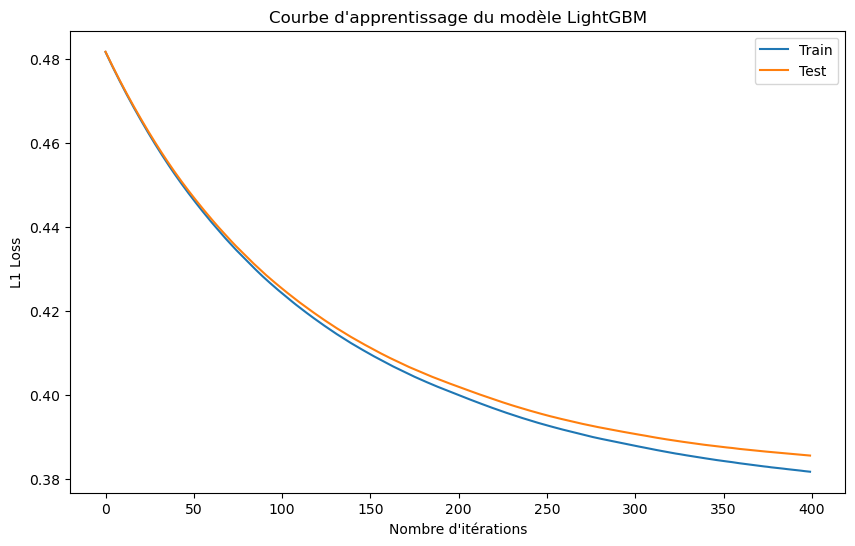

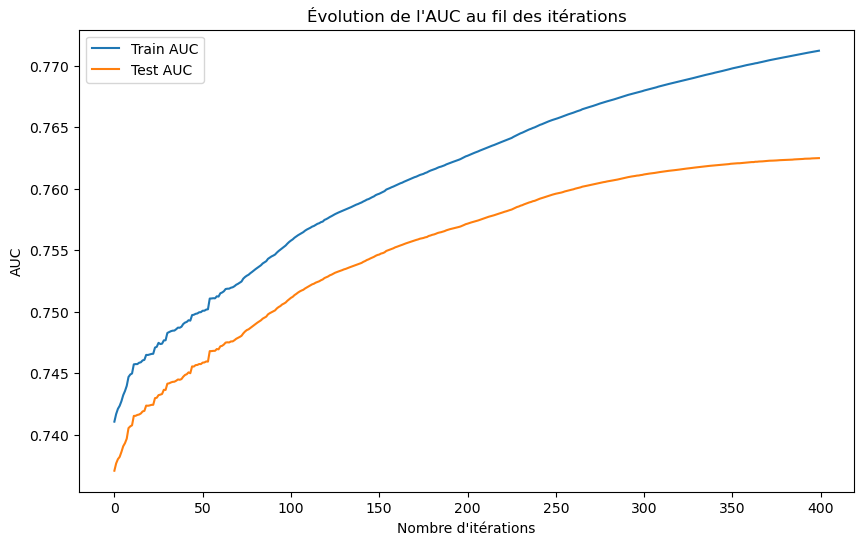

In [30]:
feature_imp_df = training_model(lgb_model,X,y)

# **FEATURE ENGINEERING :**

In [31]:
def feature_engineering_lieux(df):

    df = lieux_preprocessing_(df)

    return df

In [32]:
lieux_fe = feature_engineering_lieux(lieux)

# **TRAINING MODEL VEHICULES :**

In [33]:
X = lieux_fe.drop(['Num_Acc','GRAVE'],axis = 1)
y = lieux_fe['GRAVE']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

AUC LightGBM: 0.762486098215442


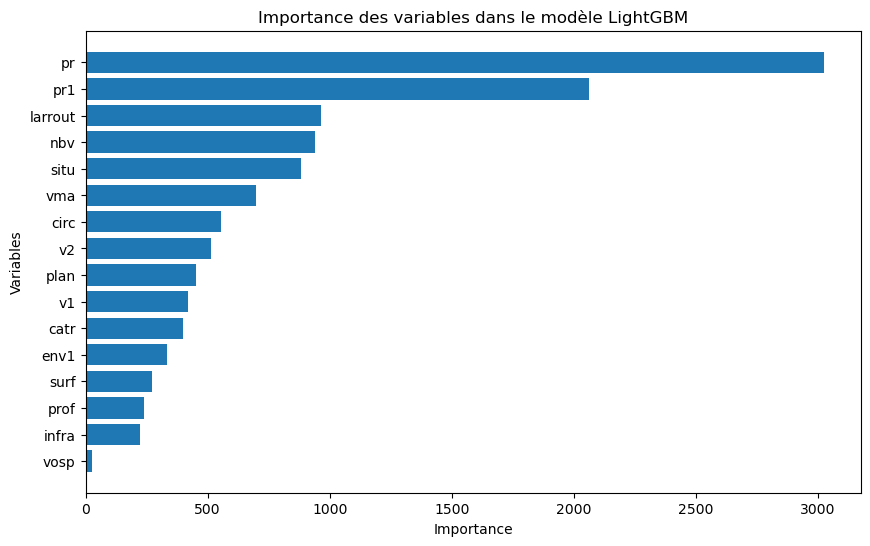

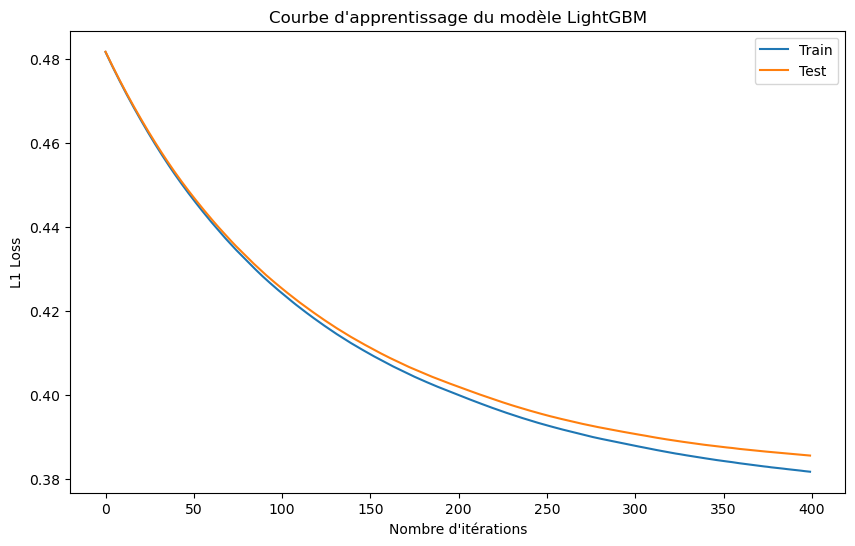

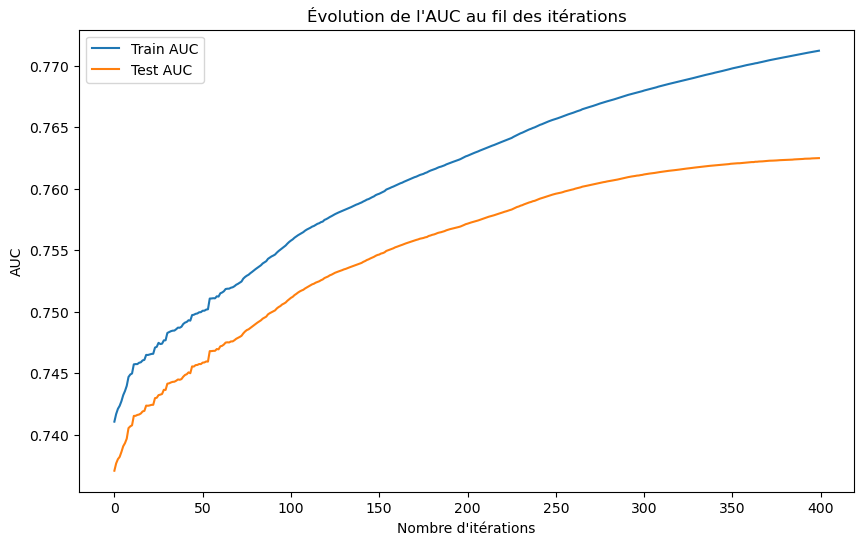

In [35]:
feature_imp_df = training_model(lgb_model,X,y)

In [36]:
lieux_fe_clean = lieux_fe.copy()

In [37]:
best_features = feature_imp_df[feature_imp_df['Importance'] > 100]

In [38]:
X = lieux_fe_clean[best_features['Feature'].to_list()]
y = lieux_fe_clean['GRAVE']

In [39]:
best_features.T

,5,6,10,4,13,15,3,2,9,1,0,14,11,8,12
Feature,pr,pr1,larrout,nbv,situ,vma,circ,v2,plan,v1,catr,env1,surf,prof,infra
Importance,3023,2063,965,939,882,698,554,512,451,418,398,334,274,240,223


In [40]:
lgb_model = lgb.LGBMClassifier(enable_categorical = True,verbose = -1,objective='binary',learning_rate = 0.005,n_estimators = 800, num_leaves  = 25)

AUC LightGBM: 0.7615160875385167


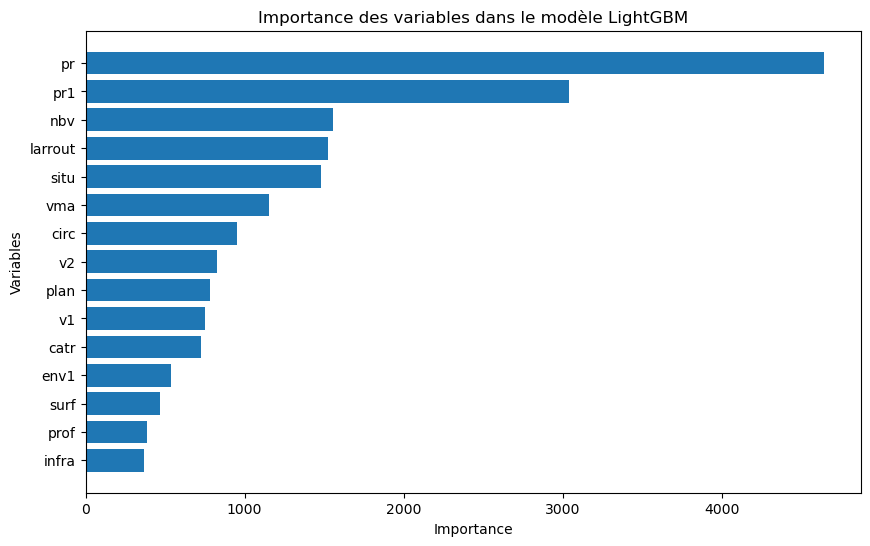

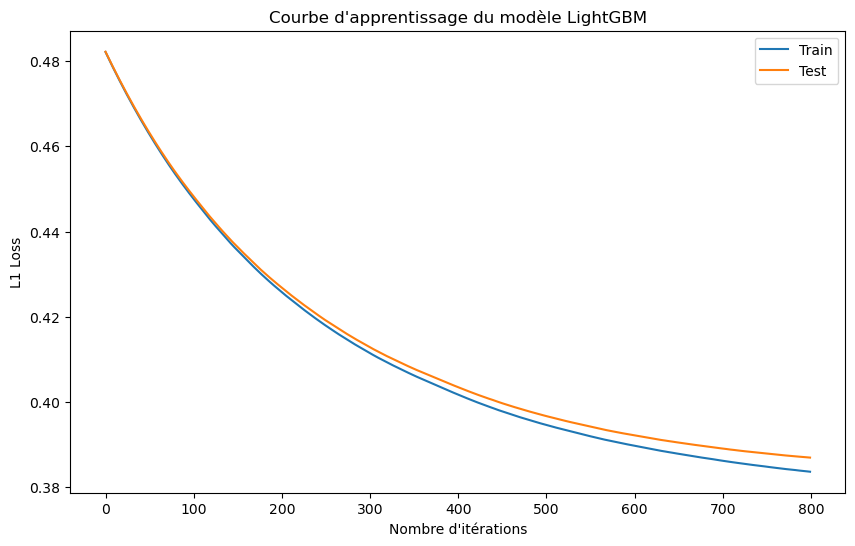

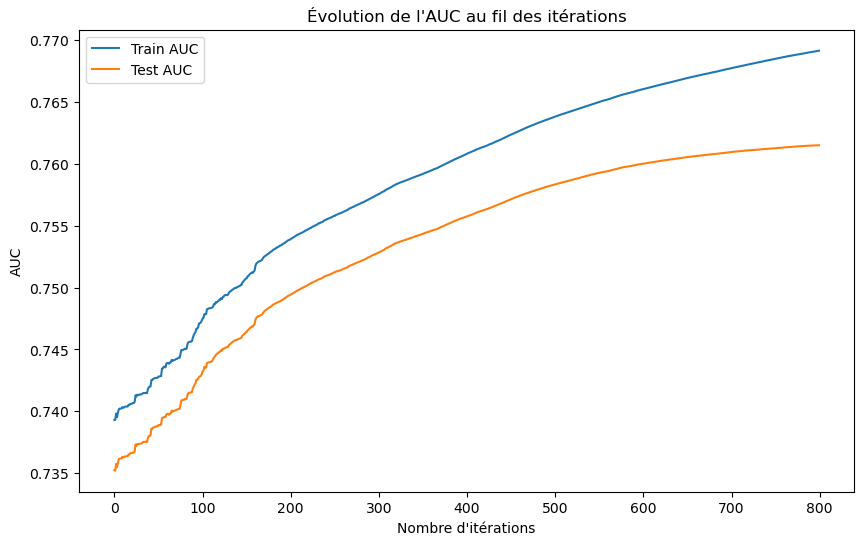

In [41]:
feature_imp_df_final = training_model(lgb_model,X,y)